In [67]:
%matplotlib inline
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import plotly.express as px #graphing
import seaborn as sns #graphing
import matplotlib.pyplot as plt
import sklearn
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score, GridSearchCV

In [69]:
train_set = pd.read_csv(r"D:\Data Science\MACHINE LEARNING\Assignment\Assignment-2 Problems using Data Preprocessing\Assignment-2 Problems using Data Preprocessing\House Price Prediction\train.csv")
train_set.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [70]:
test_set = pd.read_csv(r"D:\Data Science\MACHINE LEARNING\Assignment\Assignment-2 Problems using Data Preprocessing\Assignment-2 Problems using Data Preprocessing\House Price Prediction\train.csv")
test_set.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [71]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [72]:
train_set.shape

(1460, 81)

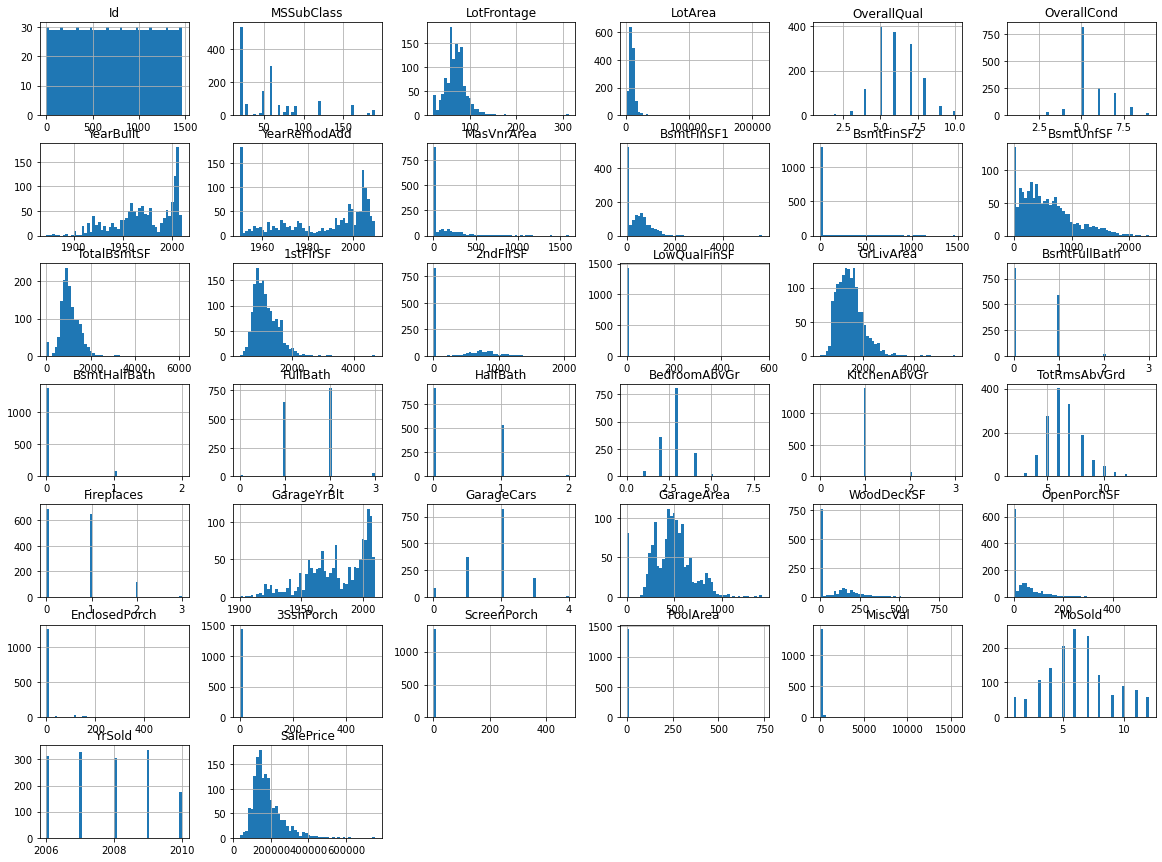

In [73]:
train_set.hist(bins=50, figsize=(20,15))
plt.show()

In [74]:
train_set.describe().style.background_gradient(cmap="Blues")

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [75]:
corr_matrix = train_set.corr()

In [76]:
corr_matrix["SalePrice"].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

In [77]:
# main features, gonna do some feature engineering to add the total sqft of the house instead of the 1st and 2nd floor alone

new_train_set = train_set.loc[:, ["SalePrice", "OverallQual", "GarageArea", "GarageCars" ,"YearBuilt", "LotArea", "GrLivArea", "PoolArea", "TotalBsmtSF", "Utilities", "Electrical", "Street"]]
new_train_set.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   SalePrice    1460 non-null   int64 
 1   OverallQual  1460 non-null   int64 
 2   GarageArea   1460 non-null   int64 
 3   GarageCars   1460 non-null   int64 
 4   YearBuilt    1460 non-null   int64 
 5   LotArea      1460 non-null   int64 
 6   GrLivArea    1460 non-null   int64 
 7   PoolArea     1460 non-null   int64 
 8   TotalBsmtSF  1460 non-null   int64 
 9   Utilities    1460 non-null   object
 10  Electrical   1459 non-null   object
 11  Street       1460 non-null   object
dtypes: int64(9), object(3)
memory usage: 137.0+ KB


<AxesSubplot:>

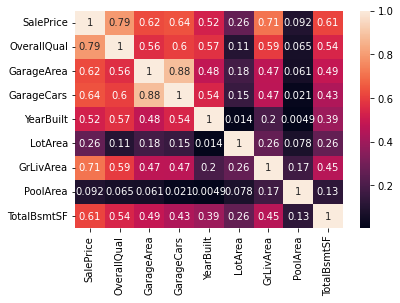

In [78]:
new_corr = new_train_set.corr()
sns.heatmap(new_corr, annot=True)

In [79]:
new_test_set = test_set.loc[:, ["Id","OverallQual", "GarageArea", "YearBuilt", "GarageCars" ,"LotArea","GrLivArea", "PoolArea", "TotalBsmtSF", "Utilities", "Electrical", "Street"]]
new_test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Id           1460 non-null   int64 
 1   OverallQual  1460 non-null   int64 
 2   GarageArea   1460 non-null   int64 
 3   YearBuilt    1460 non-null   int64 
 4   GarageCars   1460 non-null   int64 
 5   LotArea      1460 non-null   int64 
 6   GrLivArea    1460 non-null   int64 
 7   PoolArea     1460 non-null   int64 
 8   TotalBsmtSF  1460 non-null   int64 
 9   Utilities    1460 non-null   object
 10  Electrical   1459 non-null   object
 11  Street       1460 non-null   object
dtypes: int64(9), object(3)
memory usage: 137.0+ KB


In [80]:
new_test_set["GrAreaPerCars"] = new_test_set["GarageCars"] + new_test_set["GarageArea"]
new_train_set["GrAreaPerCars"] = new_train_set["GarageCars"] + new_train_set["GarageArea"]
new_train_set.drop(["GarageCars", "GarageArea"], axis=1,inplace=True)
new_test_set.drop(["GarageCars", "GarageArea"], axis=1,inplace=True)
new_test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Id             1460 non-null   int64 
 1   OverallQual    1460 non-null   int64 
 2   YearBuilt      1460 non-null   int64 
 3   LotArea        1460 non-null   int64 
 4   GrLivArea      1460 non-null   int64 
 5   PoolArea       1460 non-null   int64 
 6   TotalBsmtSF    1460 non-null   int64 
 7   Utilities      1460 non-null   object
 8   Electrical     1459 non-null   object
 9   Street         1460 non-null   object
 10  GrAreaPerCars  1460 non-null   int64 
dtypes: int64(8), object(3)
memory usage: 125.6+ KB


In [81]:
x = new_train_set.drop("SalePrice", axis = 1)
y = new_train_set.SalePrice
x.head()

,OverallQual,YearBuilt,LotArea,GrLivArea,PoolArea,TotalBsmtSF,Utilities,Electrical,Street,GrAreaPerCars
0,7,2003,8450,1710,0,856,AllPub,SBrkr,Pave,550
1,6,1976,9600,1262,0,1262,AllPub,SBrkr,Pave,462
2,7,2001,11250,1786,0,920,AllPub,SBrkr,Pave,610
3,7,1915,9550,1717,0,756,AllPub,SBrkr,Pave,645
4,8,2000,14260,2198,0,1145,AllPub,SBrkr,Pave,839


In [82]:
reg = RandomForestRegressor()

In [83]:
column_trans = make_column_transformer((OneHotEncoder(handle_unknown="ignore"), ["Utilities", "Electrical", "Street"]),(SimpleImputer(), ["TotalBsmtSF", "GrAreaPerCars"]), remainder="passthrough")
column_trans.fit_transform(x)

array([[1.000e+00, 0.000e+00, 0.000e+00, ..., 8.450e+03, 1.710e+03,
        0.000e+00],
       [1.000e+00, 0.000e+00, 0.000e+00, ..., 9.600e+03, 1.262e+03,
        0.000e+00],
       [1.000e+00, 0.000e+00, 0.000e+00, ..., 1.125e+04, 1.786e+03,
        0.000e+00],
       ...,
       [1.000e+00, 0.000e+00, 0.000e+00, ..., 9.042e+03, 2.340e+03,
        0.000e+00],
       [1.000e+00, 0.000e+00, 1.000e+00, ..., 9.717e+03, 1.078e+03,
        0.000e+00],
       [1.000e+00, 0.000e+00, 0.000e+00, ..., 9.937e+03, 1.256e+03,
        0.000e+00]])

In [84]:
param_grid = [{'n_estimators': [ 3,10,30], 'max_features': [6,8,10,12]}, {'bootstrap': [False], 'n_estimators': [3,10], 'max_features': [4,5,6]}]
grid_search = GridSearchCV(reg, param_grid,cv=5, scoring="neg_mean_squared_error")
grid_search_pipeline = pipe = make_pipeline(column_trans, grid_search)
print(reg.get_params().keys())

dict_keys(['bootstrap', 'ccp_alpha', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])


In [85]:
grid_search_pipeline.fit(x,y)
grid_search_pipeline.predict(x)
print(grid_search.best_estimator_)

RandomForestRegressor(max_features=8, n_estimators=30)


In [86]:
pipe = make_pipeline(column_trans, grid_search.best_estimator_)

In [87]:
cross_val_score(pipe,x,y, cv=5, scoring="neg_mean_squared_error").mean()

-1042945483.3069623

In [88]:
pipe.fit(x,y)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Utilities', 'Electrical',
                                                   'Street']),
                                                 ('simpleimputer',
                                                  SimpleImputer(),
                                                  ['TotalBsmtSF',
                                                   'GrAreaPerCars'])])),
                ('randomforestregressor',
                 RandomForestRegressor(max_features=8, n_estimators=30))])

In [89]:
predictions = pipe.predict(new_test_set)
print(predictions)

[207295.         176306.66666667 218343.33333333 ... 252730.
 138800.83333333 145875.3       ]


In [90]:
sub = {'Id': new_test_set.Id, 'SalePrice': predictions}
basic_sub = pd.DataFrame(data=sub)
basic_sub.to_csv("submission.csv", index=False) # data has been saved into my drive as "submission.csv"